In [1]:
import logging, sys
logging.disable(sys.maxsize)

In [ ]:
!pip install microprediction

In [ ]:
!pip install git+https://github.com/AbdullahO/mSSA.git

## Hello world example

See https://www.microprediction.com/blog/popular-timeseries-packages for more packag

In [2]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_tears_of_joy.json')[:50]

In [3]:
from mssa.mssa import mSSA
import pandas as pd 
import datetime 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

def run(ys):
    burnin = 100

    def next_value(ys):
        model = mSSA()
        model.update_model(ys) 
        y_hat = model.predict(1)
        return y_hat

    y_hats = list()
    for t in range(len(ys)):
        if t > burnin:
            y_hat = next_value(ys[:t])
        elif t >= 1:
            y_hat = ys[t - 1]
        else:
            y_hat = 0
        y_hats.append(y_hat)
    return y_hats
XS = run(YS)

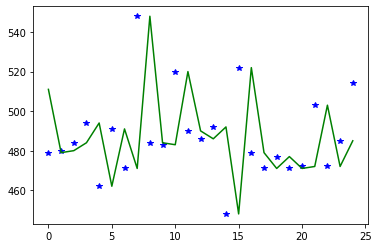

In [4]:
import matplotlib.pyplot as plt
plt.plot(YS[25:],'*b')
plt.plot(XS[25:],'g')